## Exploratory Data Analysis on the new Insurance Fraud Dataset

### Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

## Read the data file

In [12]:
df = pd.read_csv(r"C:\Users\JT von Seggern\DS Masters Repos\799S-Data-Science-Capstone\data\insurance_fraud_data.csv")
df.head()

claim_number  age_of_driver gender marital_status  safety_rating  \
0        414724             39      M              1             73   
1        269568             33      M              1             72   
2        974592             31      M              1             76   
3        995328             53      F              1             93   
4       1140480             41      M              1             87   

   annual_income  high_education  address_change property_status  zip_code  \
0        58612.8               1               0             Own     50048   
1        35936.0               0               1             Own     50006   
2        84940.8               1               1             Own     15021   
3        73526.4               0               1             Own     85027   
4        59403.2               1               0             Own     80046   

   claim_date claim_day_of_week accident_site  past_num_of_claims  \
0   8/12/2023          Saturday       Highway                   0   
1  10/18/2024            Friday         Local                   0   
2  12/23/2023          Saturday         Local                   0   
3   2/25/2024            Sunday   Parking Lot                   0   
4    9/4/2024         Wednesday         Local                   0   

  witness_present  liab_prct channel  police_report age_of_vehicle  \
0               0         25   Phone              0              8   
1               1         45   Phone              0              2   
2               0        100   Phone              0              7   
3               0        100   Phone              0              1   
4               0         25   Phone              0              6   

  vehicle_category  vehicle_price vehicle_color  total_claim injury_claim  \
0            Large    24360.59273        silver  26633.27819  5196.552552   
1           Medium    23457.35282         black  26707.46021  7957.267641   
2           Medium    19752.42523          gray  15279.38583  3014.110884   
3           Medium    32910.34224           red  20909.27772  5671.599025   
4           Medium    28570.37675           red  34493.97997  4064.569489   

   policy deductible  annual premium  days open  form defects fraud reported  
0               1000         1406.91   8.641800             5              N  
1               2000         1415.74  10.009761             5              Y  
2               1000         1199.44   8.264032             3              N  
3                500          708.64   9.235943             4              N  
4               1000         1187.96  10.259629             2              N

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   claim_number        12002 non-null  int64  
 1   age_of_driver       12002 non-null  int64  
 2   gender              12002 non-null  object 
 3   marital_status      12002 non-null  object 
 4   safety_rating       12002 non-null  int64  
 5   annual_income       12002 non-null  float64
 6   high_education      12002 non-null  int64  
 7   address_change      12002 non-null  int64  
 8   property_status     12002 non-null  object 
 9   zip_code            12002 non-null  int64  
 10  claim_date          12002 non-null  object 
 11  claim_day_of_week   12002 non-null  object 
 12  accident_site       12002 non-null  object 
 13  past_num_of_claims  12002 non-null  int64  
 14  witness_present     12002 non-null  object 
 15  liab_prct           12002 non-null  int64  
 16  chan

claim_number  age_of_driver  safety_rating  annual_income  \
count  1.200200e+04   12002.000000   12002.000000   12002.000000   
mean   3.119801e+08      43.525162      73.702966   63658.226534   
std    1.795997e+08      12.201298      15.378967   17289.704559   
min    1.866240e+05      19.000000       2.000000      -1.600000   
25%    1.561887e+08      35.000000      66.000000   56899.200000   
50%    3.121908e+08      43.000000      76.000000   60899.200000   
75%    4.677938e+08      51.000000      85.000000   64697.600000   
max    6.220385e+08     278.000000     100.000000  257313.600000   

       high_education  address_change      zip_code  past_num_of_claims  \
count    12002.000000    12002.000000  12002.000000        12002.000000   
mean         0.698134        0.576737  49762.387269            0.494918   
std          0.459087        0.494097  29133.180765            0.956002   
min          0.000000        0.000000      0.000000            0.000000   
25%          0.000000        0.000000  20111.000000            0.000000   
50%          1.000000        1.000000  50027.000000            0.000000   
75%          1.000000        1.000000  80036.750000            1.000000   
max          1.000000        1.000000  85083.000000            6.000000   

          liab_prct  police_report  vehicle_price    total_claim  \
count  12002.000000   12002.000000   12002.000000   12002.000000   
mean      49.770122       0.601066   22925.335594   22861.534958   
std       33.581191       0.489699   12108.888412   12197.334761   
min        0.000000       0.000000    2261.507903    2583.428985   
25%       18.000000       0.000000   14087.559950   13832.784382   
50%       50.000000       1.000000   20642.029325   20508.293695   
75%       82.000000       1.000000   29293.641235   29205.553660   
max      100.000000       1.000000  106991.684500  101818.964200   

       policy deductible  annual premium     days open  form defects  
count       12002.000000    12002.000000  12002.000000  12002.000000  
mean         1011.039827     1268.140663      8.799198      3.969588  
std           562.099581      231.670671      2.413533      1.986915  
min           500.000000      433.330000      2.303305      0.000000  
25%           500.000000     1082.360000      8.025550      3.000000  
50%          1000.000000     1239.060000      9.268787      4.000000  
75%          1000.000000     1383.490000     10.307928      5.000000  
max          2000.000000     2047.590000     15.177169     13.000000

In [4]:
def encoding(df_or_series, cat_cols: list = None, one_hot: bool = False):
    """
    Encodes categorical columns in a DataFrame or a single pandas Series.

    Args:
        df_or_series: DataFrame or Series to encode.
        cat_cols: List of columns to encode (only used if input is DataFrame).
        one_hot: If True, use one-hot encoding for DataFrame input.

    Returns:
        If input is DataFrame: (encoded DataFrame, mappings dict or list of new columns)
        If input is Series: (encoded Series, mapping dict)
    """
    if isinstance(df_or_series, pd.Series):
        uniques = df_or_series.dropna().unique().tolist()
        mapping = {cat: code for code, cat in enumerate(uniques)}
        encoded = df_or_series.map(mapping).astype("int64")
        return encoded
    
    elif isinstance(df_or_series, pd.DataFrame):
        if one_hot:
            if cat_cols is None:
                cat_cols = df_or_series.select_dtypes(include=['object', 'category']).columns.tolist()
            df_encoded = pd.get_dummies(df_or_series, columns=cat_cols, drop_first=True)
            return df_encoded
        else:
            df_encoded = df_or_series.copy()
            mappings = {}
            if cat_cols is None:
                cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
            for col in cat_cols:
                uniques = df_encoded[col].dropna().unique().tolist()
                mapping = {cat: code for code, cat in enumerate(uniques)}
                mappings[col] = mapping
                df_encoded[col] = df_encoded[col].map(mapping).astype("int64")
            return df_encoded
    
    else:
        raise ValueError("Input must be a pandas DataFrame or Series.")

In [10]:
# Count unique values for categorical features
df.select_dtypes(include=['object']).nunique()


gender                   2
marital_status           3
property_status          2
claim_date             683
claim_day_of_week        8
accident_site            3
witness_present          3
channel                  3
age_of_vehicle          16
vehicle_category         3
vehicle_color            7
injury_claim         11989
fraud reported           2
dtype: int64

In [7]:
# encode the dataset
df_encoded = encoding(df)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

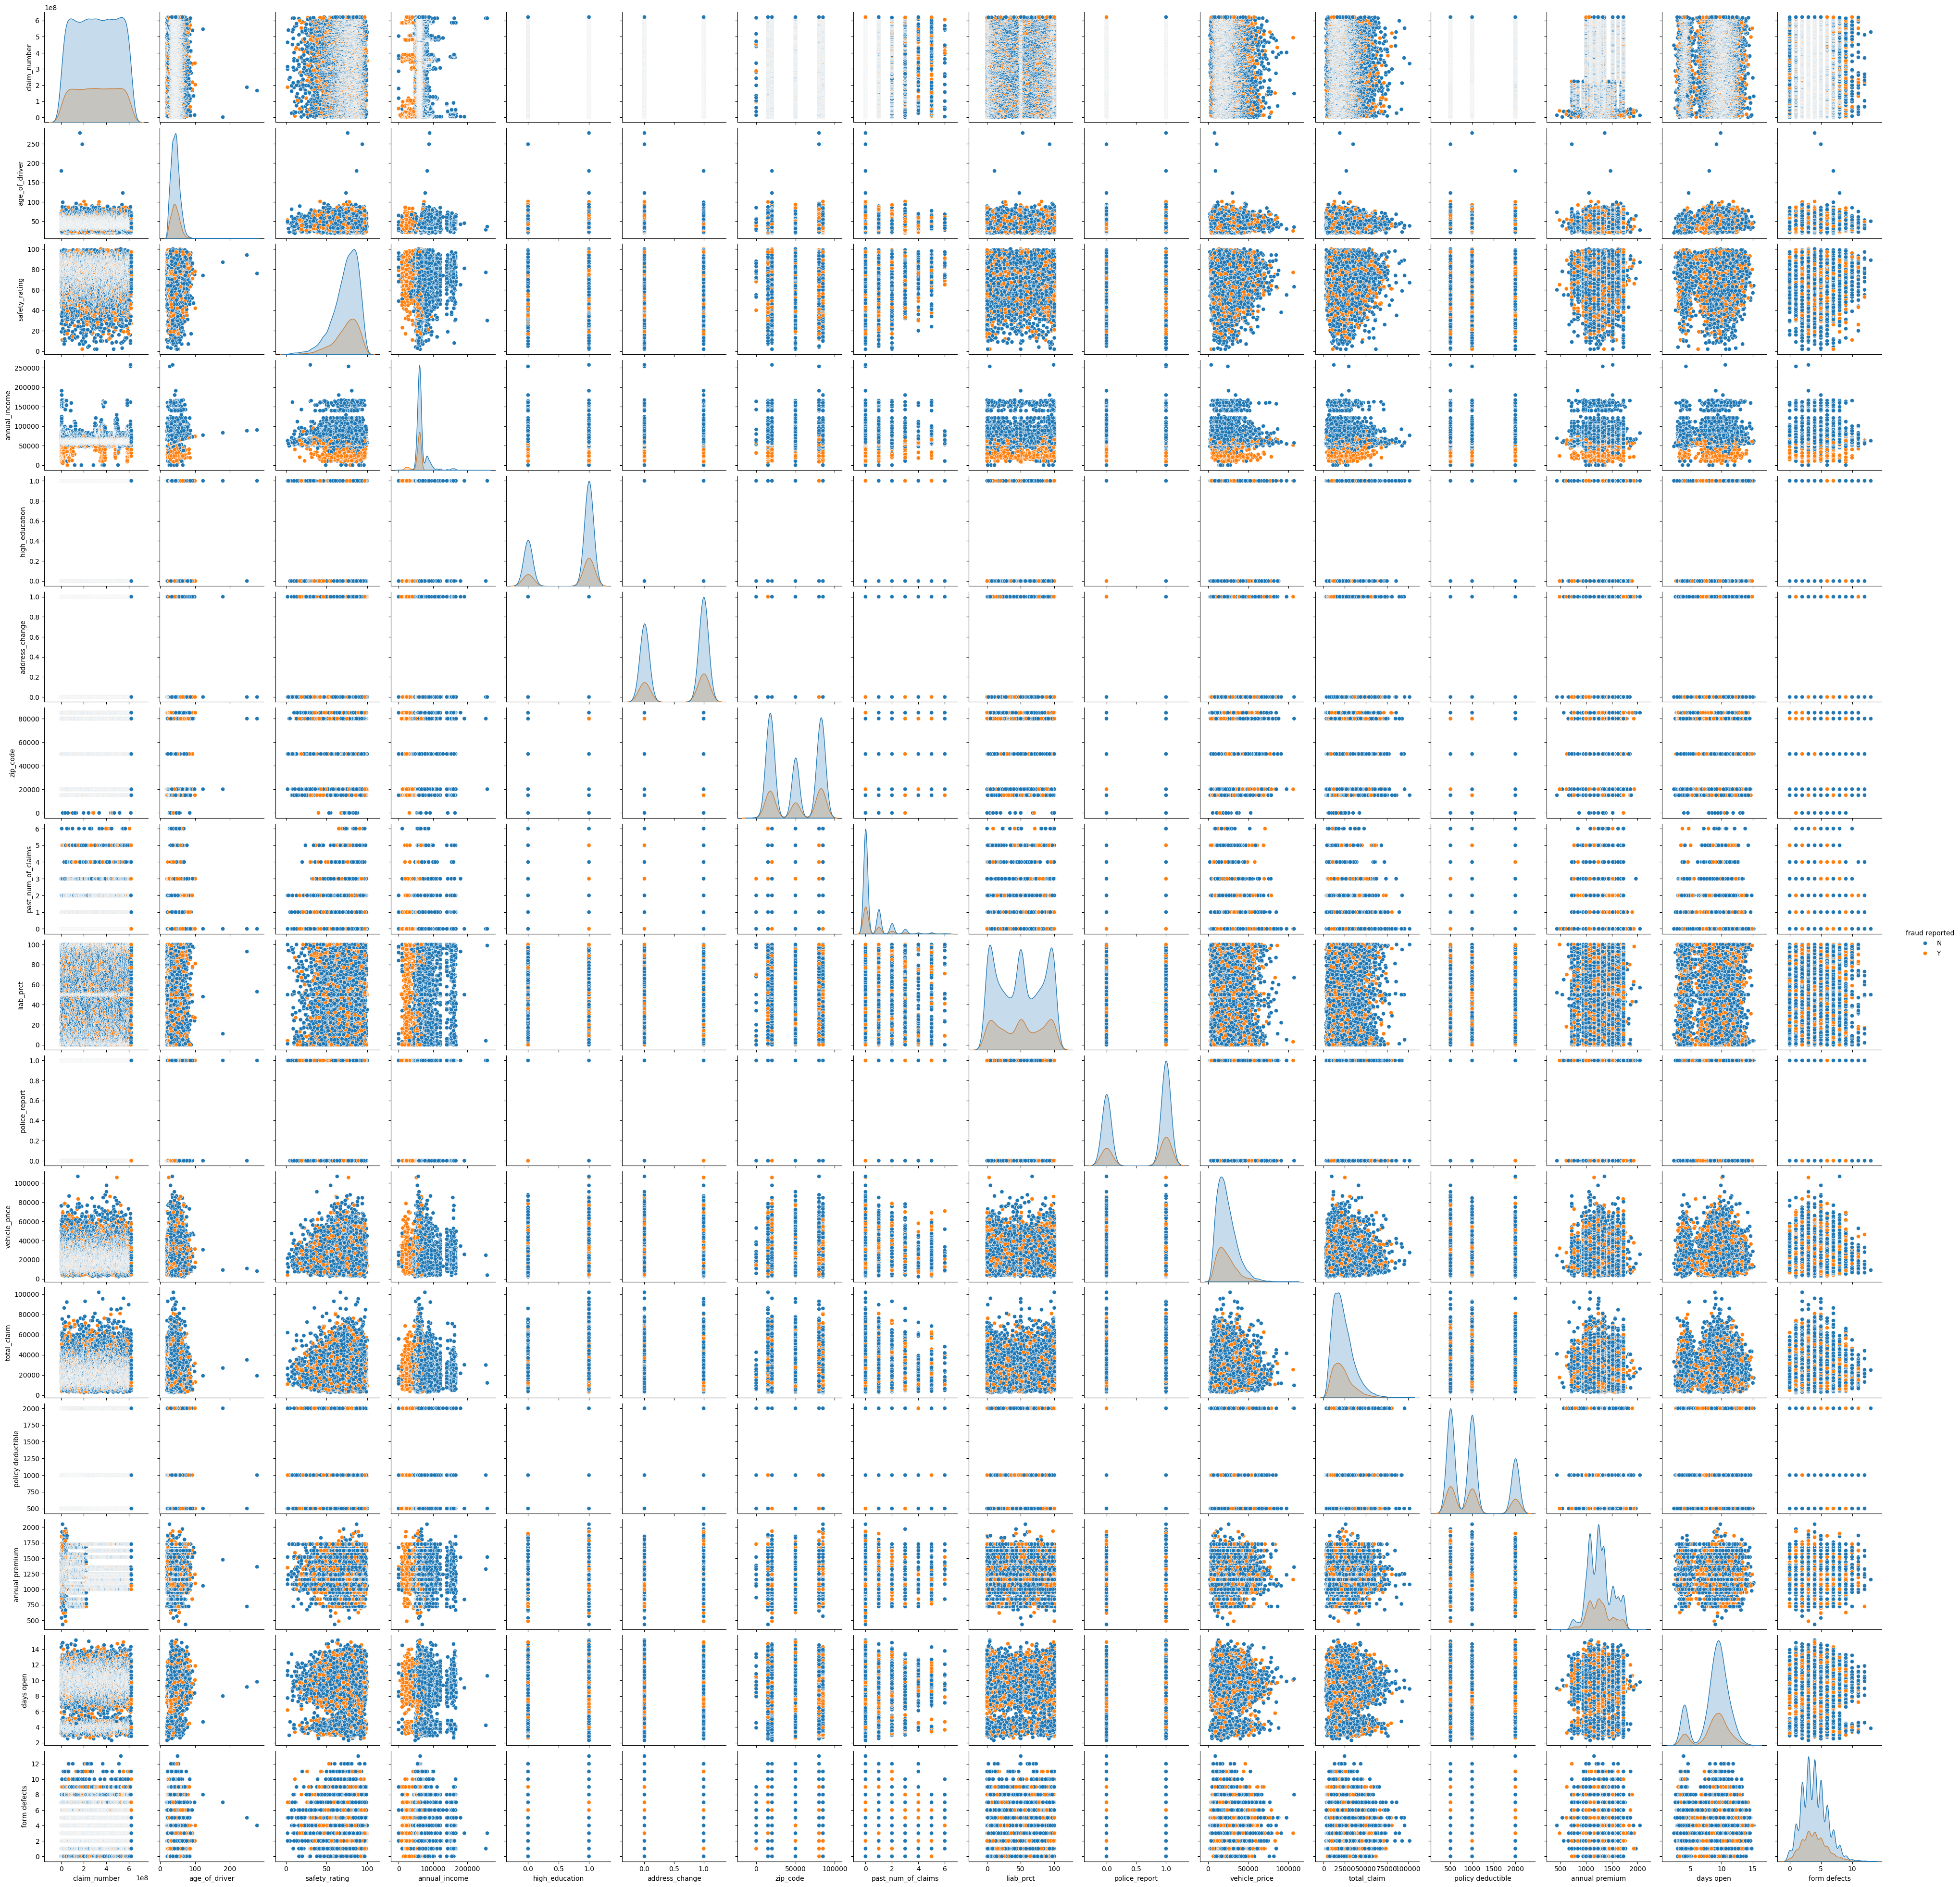

In [ ]:
# visualize the categorical features
sns.heatmap(df, hue='fraud reported')